Loading required package: gRbase
Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required pack

age,workclass,education,marital.status,occupation,race,sex,hours.per.week,native.country,income
2,5,2,2,0,0,0,3,0,0
3,1,2,0,0,0,0,0,0,0
2,0,2,1,1,0,0,3,0,0
4,0,1,0,1,4,0,3,0,0
1,0,2,0,3,4,1,3,1,0
2,0,3,0,0,0,1,3,0,0


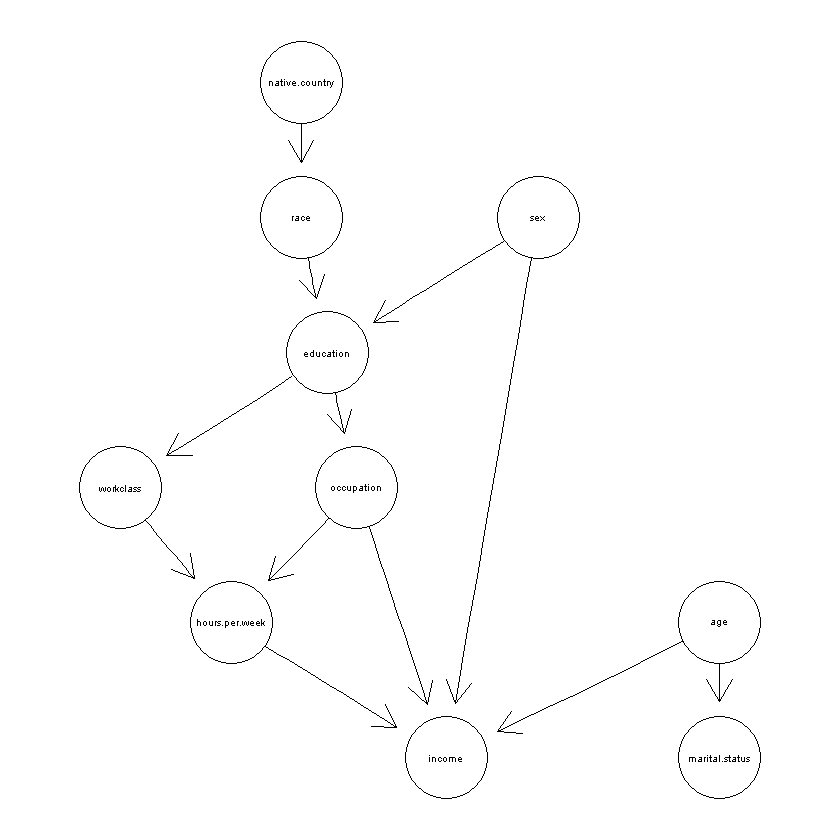

In [4]:
library("gRain")
library("Rgraphviz")
library("dagitty")
library('combinat')

setwd("C:/Users/Valentin/Uni/RU/Sem1/Bayesian Networks")
data <- read.table(header=T, sep=",", 'adult_cleaned.csv')


our_network <- dag(~ race:native.country + education:race:sex + workclass:education + hours.per.week:workclass:occupation + occupation:education + marital.status:age + income:age:sex:occupation:hours.per.week)
plot(our_network)
head(data)

data[data=="?"]<-NA
data<-data[complete.cases(data),]

In [5]:
g <- dagitty( "dag{ native.country -> race -> education -> occupation -> hours.per.week -> income; occupation -> income; education -> workclass -> hours.per.week; sex -> education; sex -> income; age -> income; age -> marital.status}" )

In [6]:
independencies <- impliedConditionalIndependencies( g )

In [4]:
print(independencies)

age _||_ education
age _||_ hours.per.week
age _||_ native.country
age _||_ occupation
age _||_ race
age _||_ sex
age _||_ workclass
education _||_ hours.per.week | occupation, workclass
education _||_ income | hours.per.week, occupation, sex
education _||_ income | occupation, sex, workclass
education _||_ marital.status
education _||_ native.country | race
hours.per.week _||_ marital.status
hours.per.week _||_ native.country | race
hours.per.week _||_ native.country | education
hours.per.week _||_ native.country | occupation, workclass
hours.per.week _||_ race | education
hours.per.week _||_ race | occupation, workclass
hours.per.week _||_ sex | education
hours.per.week _||_ sex | occupation, workclass
income _||_ marital.status | age
income _||_ native.country | race
income _||_ native.country | education, sex
income _||_ native.country | occupation, sex, workclass
income _||_ native.country | hours.per.week, occupation, sex
income _||_ race | education, sex
income _||_ race | occup

In [20]:
#typeof(strata)
#strata[1]
#dim(table(data[,xyz[-(1:2)]]))[1]
#order(table(data[,xyz[-(1:2)]]),decreasing=T)
#2%/%6
#2%%6
for_count_strata <- as.data.frame(sort(table(data[,xyz[-(1:2)]]),decreasing=T))
for_count_strata
visited
#sum(for_count_strata)
#all

Var1,Freq
0,25933
4,2817
1,895
2,286
3,231


[1] 0

In [79]:
as.data.frame(sort(table(data[,xyz[-(1:2)]]),decreasing=T,index.return=T))$ix

NULL

In [18]:
num_test <- 0
for(i in 1:length(independencies)){
    indp <- independencies[i]
    xyz <- unlist(indp)
    print(xyz)
    if(length(xyz)>3){

    }
    if(length(xyz)==2){
        print(paste('test: ', xyz[1], ' and ', xyz[2]))
        tst <- chisq.test(data[,xyz[1]], data[,xyz[2]])
        res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(data) - 1)*tst$parameter),0))
        if(res > 0.05){
            print(res)
        }
        num_test <- num_test + 1
    }
    else{
        print(paste('test ', xyz[1], ' and ', xyz[2], 'given ', xyz[-(1:2)]))
        strata <- order(table(data[,xyz[-(1:2)]]),decreasing=T)
        dimensions = dim(strata)
        #strata <- list()
        #for(i in 1:length(xyz[-(1:2)])){
        #        strata[i] <- as.data.frame(sort(table(data[,xyz[2+i]]),decreasing=T))
        #}
        for_count_strata <- as.data.frame(sort(table(data[,xyz[-(1:2)]]),decreasing=T))
        #permlist <- expand.grid(strata)
        visited <- 0
        idx <- 1
        all <- sum(for_count_strata)
        #for (j in 1:dim(permlist[1]){
            for (j in 1:5){
            #while(visited<0.8*all){
                print(paste('stratum: ',strata[idx]),max.levels=0)
                print(visited)
                current_index = strata[idx]
            
                if (length(xyz)==4){
                    subdata <- subset(data, data[,xyz[3]] == (current_index%/%dimensions[1]) & data[,xyz[4]] == (current_index%%dimensions[1]))
                    x <- subdata[,xyz[1]]
                    y <- subdata[,xyz[2]]
                    if(length(unique(x)) < 2 || length(unique(y)) < 2){
                        break
                    }
                    tst <- chisq.test(x,y)
                    res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(subdata) - 1)*tst$parameter),0))
                    if(res > 0.05){
                        print(res)
                    }
                
                    visited <- visited + for_count_strata[idx,1]
                    idx <- idx + 1
                    num_test <- num_test + 1
                }              
            }
            #subdata <- subset(data, data[,xyz[3]] == strata[idx,1])
            #x <- subdata[,xyz[1]]
            #y <- subdata[,xyz[2]]
            #if(length(unique(x)) < 2 || length(unique(y)) < 2){
#                break
#            }
#            tst <- chisq.test(x,y)
#            res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(subdata) - 1)*tst$parameter),0))
#            if(res > 0.05){
#                print(res)
#            }
#            
#            visited <- visited + strata[idx,2]
#            idx <- idx + 1
#            num_test <- num_test + 1
        #}
    }
}

        1.X         1.Y 
      "age" "education" 
[1] "test:  age  and  education"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

             2.X              2.Y 
           "age" "hours.per.week" 
[1] "test:  age  and  hours.per.week"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

[1] 0.07403111
             3.X              3.Y 
           "age" "native.country" 
[1] "test:  age  and  native.country"
         4.X          4.Y 
       "age" "occupation" 
[1] "test:  age  and  occupation"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

   5.X    5.Y 
 "age" "race" 
[1] "test:  age  and  race"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

  6.X   6.Y 
"age" "sex" 
[1] "test:  age  and  sex"
        7.X         7.Y 
      "age" "workclass" 
[1] "test:  age  and  workclass"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

             8.X              8.Y             8.Z1             8.Z2 
     "education" "hours.per.week"     "occupation"      "workclass" 
[1] "test  education  and  hours.per.week given  occupation"
[2] "test  education  and  hours.per.week given  workclass" 
[1] "stratum:  2"
[1] 0
             9.X              9.Y             9.Z1             9.Z2 
     "education"         "income" "hours.per.week"     "occupation" 
            9.Z3 
           "sex" 
[1] "test  education  and  income given  hours.per.week"
[2] "test  education  and  income given  occupation"    
[3] "test  education  and  income given  sex"           
[1] "stratum:  10"
[1] 0
[1] "stratum:  10"
[1] 0
[1] "stratum:  10"
[1] 0
[1] "stratum:  10"
[1] 0
[1] "stratum:  10"
[1] 0
        10.X         10.Y        10.Z1        10.Z2        10.Z3 
 "education"     "income" "occupation"        "sex"  "workclass" 
[1] "test  education  and  income given  occupation"
[2] "test  education  and  income given  sex"       
[3] "tes

Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
"Chi-squared approximation may be incorrect"

            12.X             12.Y             12.Z 
     "education" "native.country"           "race" 
[1] "test  education  and  native.country given  race"


ERROR: Error in FUN(X[[i]], ...): only defined on a data frame with all numeric variables


In [1]:
num_test

ERROR: Error in eval(expr, envir, enclos): Objekt 'num_test' nicht gefunden


In [ ]:
net1 <- compile( grain( our_network, data, smooth=1 ) )

In [ ]:
pp <- extractCPT( data, our_network, smooth=1)

In [ ]:
querygrain(net1, nodes='income',type = "marginal", evidence = NULL, exclude = TRUE, normalize = TRUE, result = "array", details = 0)

In [ ]:
table(data['income'])

In [ ]:
24720 / (24720+7841)